In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv('aapl_no_dates1.csv')
df

,Open,High,Low,Close,Volume
0,144.88,145.30,143.10,143.50,14277848
1,143.69,144.79,142.72,144.09,21569557
2,143.02,143.50,142.41,142.73,24128782
3,142.90,144.75,142.90,144.18,19201712
4,144.11,145.95,143.37,145.06,21090636
5,144.73,145.85,144.38,145.53,19781836
6,145.87,146.18,144.82,145.74,24884478
7,145.50,148.49,145.44,147.77,25199373
8,147.97,149.33,147.33,149.04,20132061
9,148.82,150.90,148.57,149.56,23793456


In [12]:
rng=pd.date_range(start='7-01-2017',end='7-21-2017',freq='B')### this dataFRAME IS NOT GOING TO  WORK AS IN 4TH JULY IT WAS HOLODAY IN USA SO WE HAVE TO MAKE A RNG FUN WHICH CAN REMOVE HOLIDAYS 
rng

DatetimeIndex(['2017-07-03', '2017-07-04', '2017-07-05', '2017-07-06',
               '2017-07-07', '2017-07-10', '2017-07-11', '2017-07-12',
               '2017-07-13', '2017-07-14', '2017-07-17', '2017-07-18',
               '2017-07-19', '2017-07-20', '2017-07-21'],
              dtype='datetime64[ns]', freq='B')

In [13]:
df.set_index(rng,inplace=True)## SEE IT IS NOT WORKING SO  WE HAVE TO EXCLUDE HOLIDYAS FROM DATAFRAME 
df

ValueError: Length mismatch: Expected 14 rows, received array of length 15

In [18]:
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay
usb=CustomBusinessDay(calendar=USFederalHolidayCalendar())
usb


<CustomBusinessDay>

In [22]:
rng=pd.date_range(start='7-01-2017',end='7-21-2017',freq=usb)
rng


DatetimeIndex(['2017-07-03', '2017-07-05', '2017-07-06', '2017-07-07',
               '2017-07-10', '2017-07-11', '2017-07-12', '2017-07-13',
               '2017-07-14', '2017-07-17', '2017-07-18', '2017-07-19',
               '2017-07-20', '2017-07-21'],
              dtype='datetime64[ns]', freq='C')

In [24]:
df.set_index(rng,inplace=True)## now see holidays was removed like 4th july etc 
df

,Open,High,Low,Close,Volume
2017-07-03,144.88,145.30,143.10,143.50,14277848
2017-07-05,143.69,144.79,142.72,144.09,21569557
2017-07-06,143.02,143.50,142.41,142.73,24128782
2017-07-07,142.90,144.75,142.90,144.18,19201712
2017-07-10,144.11,145.95,143.37,145.06,21090636
2017-07-11,144.73,145.85,144.38,145.53,19781836
2017-07-12,145.87,146.18,144.82,145.74,24884478
2017-07-13,145.50,148.49,145.44,147.77,25199373
2017-07-14,147.97,149.33,147.33,149.04,20132061
2017-07-17,148.82,150.90,148.57,149.56,23793456


<AxesSubplot:>

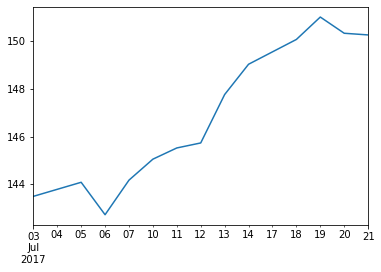

In [26]:
%matplotlib inline
df.Close.plot()